In [53]:
"""
censusDataForRealEstate.ipynb

This program is made to take a look at some summary demographic information on a state, county,
and district level in order to inform future investment decisions. Data is read in from the 
censusdata api for python and visualized using matplotlib

"""

# Import libraries and set up pandas for reading in data
import pandas as pd
import censusdata
import matplotlib.pyplot as plt
import numpy as np

# State table
STATES = {"AL" : 0, 
          "AK" : 1,
          "AZ" : 2,
          "AR" : 3,
          "CA" : 4,
          "CO" : 5,
          "CT" : 6,
          "DE" : 7,
          "DC" : 8,
          "FL" : 9,
          "GA" : 10,
          "HI" : 11,
          "ID" : 12,
          "IL" : 13,
          "IN" : 14,
          "IA" : 15,
          "KS" : 16,
          "KY" : 17,
          "LA" : 18,
          "ME" : 19,
          "MD" : 20,
          "MA" : 21,
          "MI" : 22,
          "MN" : 23,
          "MS" : 24,
          "MO" : 25,
          "MT" : 26,
          "NE" : 27,
          "NV" : 28,
          "NH" : 29,
          "NJ" : 30,
          "NM" : 31,
          "NY" : 32,
          "NC" : 33,
          "ND" : 34,
          "OH" : 35,
          "OK" : 36,
          "OR" : 37,
          "PA" : 38,
          "PR" : 39,
          "RI" : 40,
          "SC" : 41,
          "SD" : 42,
          "TN" : 43,
          "TX" : 44,
          "UT" : 45,
          "VT" : 46,
          "VA" : 47,
          "WA" : 48,
          "WV" : 49,
          "WI" : 50,
          "WY" : 51,
         }

DATAFIELDS = {
    0 : "Population",
    1 : "Median Income / Capita",
    2 : "# Housing units",
    3 : "# Occupied units",
    4 : "# Vacant units",
    5 : "# Owner occupied units",
    6 : "# Renter occupied units",
    7 : "Housing units / capita",
    8 : "% occupancy Rate",
    9 : "% vacancy Rate",
    10 : "% renter occupied residency",
    11 : "%owner occupied residency",
}

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.precision', 2)

In [54]:
# Query API for relevant data from 2009-2017 and store it for plotting
"""

Data for population, number of houses, median per capita income, housing units, 
occupancy status, number of owner occupied units, number of renter occupied units, 

BlockId                 Variable Description             Code ID

B00001_001 : total population                         : 0
B19301_001 : median income per capita                 : 1
B25001_001 : number of housing units                  : 2
B25002_002 : number of occupied housing units         : 3
B25002_003 : number of vacant units                   : 4
B25003_002 : number of owner occupied housing units   : 5
B25003_003 : number of renter occupied housing units  : 6
           : Housing units per person                 : 7
           : Occupancy rate                           : 8
           : Vacancy rate                             : 9
           : Rate of renter occupied residency        : 10
           : Rate of owner occupied residency         : 11
           
"""
statedata_2017 = censusdata.download('acs5', 2017, censusdata.censusgeo([('state', '*')]),
                                ['B01003_001E', 'B19301_001E', 'B25001_001E',
                                 'B25002_002E', 'B25002_003E',
                                 'B25003_002E', 'B25003_003E'])
toAdd = pd.DataFrame()
toAdd['Housing units per person'] =  statedata_2017['B25001_001E'] / statedata_2017['B01003_001E'] 
toAdd['Occupancy rate'] = statedata_2017['B25002_002E'] / statedata_2017['B25001_001E']
toAdd['Vacancy rate'] = statedata_2017['B25002_003E'] / statedata_2017['B25001_001E']
toAdd['Rate of renter occupied residency'] = statedata_2017['B25003_003E'] / statedata_2017['B25002_002E']
toAdd['Rate of owner occupied residency'] = statedata_2017['B25003_002E'] / statedata_2017['B25002_002E']
statedata_2017 = pd.concat([statedata_2017, toAdd], axis=1, sort=False)
statedata_2017 = statedata_2017.rename(columns={'B01003_001E':'Population',
                          'B19301_001E':'Median income per capita', 'B25001_001E':'Number of housing units',
                          'B25002_002E':'Number of occupied housing units', 'B25002_003E':'Number of vacant housing units',
                          'B25003_002E':'Owner occupied units', 'B25003_003E':'Renter occupied units'})

statedata_2016 = censusdata.download('acs5', 2016, censusdata.censusgeo([('state', '*')]),
                                ['B01003_001E', 'B19301_001E', 'B25001_001E',
                                 'B25002_002E', 'B25002_003E',
                                 'B25003_002E', 'B25003_003E'])
toAdd = pd.DataFrame()
toAdd['Housing units per person'] =  statedata_2016['B25001_001E'] / statedata_2016['B01003_001E'] 
toAdd['Occupancy rate'] = statedata_2016['B25002_002E'] / statedata_2016['B25001_001E']
toAdd['Vacancy rate'] = statedata_2016['B25002_003E'] / statedata_2016['B25001_001E']
toAdd['Rate of renter occupied residency'] = statedata_2016['B25003_003E'] / statedata_2016['B25002_002E']
toAdd['Rate of owner occupied residency'] = statedata_2016['B25003_002E'] / statedata_2016['B25002_002E']
statedata_2016 = pd.concat([statedata_2016, toAdd], axis=1, sort=False)
statedata_2016 = statedata_2016.rename(columns={'B01003_001E':'Population',
                          'B19301_001E':'Median income per capita', 'B25001_001E':'Number of housing units',
                          'B25002_002E':'Number of occupied housing units', 'B25002_003E':'Number of vacant housing units',
                          'B25003_002E':'Owner occupied units', 'B25003_003E':'Renter occupied units'})


statedata_2015 = censusdata.download('acs5', 2015, censusdata.censusgeo([('state', '*')]),
                                ['B01003_001E', 'B19301_001E', 'B25001_001E',
                                 'B25002_002E', 'B25002_003E',
                                 'B25003_002E', 'B25003_003E'])
toAdd = pd.DataFrame()
toAdd['Housing units per person'] =  statedata_2015['B25001_001E'] / statedata_2015['B01003_001E'] 
toAdd['Occupancy rate'] = statedata_2015['B25002_002E'] / statedata_2015['B25001_001E']
toAdd['Vacancy rate'] = statedata_2015['B25002_003E'] / statedata_2015['B25001_001E']
toAdd['Rate of renter occupied residency'] = statedata_2015['B25003_003E'] / statedata_2015['B25002_002E']
toAdd['Rate of owner occupied residency'] = statedata_2015['B25003_002E'] / statedata_2015['B25002_002E']
statedata_2015 = pd.concat([statedata_2015, toAdd], axis=1, sort=False)
statedata_2015 = statedata_2015.rename(columns={'B01003_001E':'Population',
                          'B19301_001E':'Median income per capita', 'B25001_001E':'Number of housing units',
                          'B25002_002E':'Number of occupied housing units', 'B25002_003E':'Number of vacant housing units',
                          'B25003_002E':'Owner occupied units', 'B25003_003E':'Renter occupied units'})



statedata_2014 = censusdata.download('acs5', 2014, censusdata.censusgeo([('state', '*')]),
                                ['B01003_001E', 'B19301_001E', 'B25001_001E',
                                 'B25002_002E', 'B25002_003E',
                                 'B25003_002E', 'B25003_003E'])
toAdd = pd.DataFrame()
toAdd['Housing units per person'] =  statedata_2014['B25001_001E'] / statedata_2014['B01003_001E'] 
toAdd['Occupancy rate'] = statedata_2014['B25002_002E'] / statedata_2014['B25001_001E']
toAdd['Vacancy rate'] = statedata_2014['B25002_003E'] / statedata_2014['B25001_001E']
toAdd['Rate of renter occupied residency'] = statedata_2014['B25003_003E'] / statedata_2014['B25002_002E']
toAdd['Rate of owner occupied residency'] = statedata_2014['B25003_002E'] / statedata_2014['B25002_002E']
statedata_2014 = pd.concat([statedata_2014, toAdd], axis=1, sort=False)
statedata_2014 = statedata_2014.rename(columns={'B01003_001E':'Population',
                          'B19301_001E':'Median income per capita', 'B25001_001E':'Number of housing units',
                          'B25002_002E':'Number of occupied housing units', 'B25002_003E':'Number of vacant housing units',
                          'B25003_002E':'Owner occupied units', 'B25003_003E':'Renter occupied units'})


statedata_2013 = censusdata.download('acs5', 2013, censusdata.censusgeo([('state', '*')]),
                                ['B01003_001E', 'B19301_001E', 'B25001_001E',
                                 'B25002_002E', 'B25002_003E',
                                 'B25003_002E', 'B25003_003E'])
toAdd = pd.DataFrame()
toAdd['Housing units per person'] =  statedata_2013['B25001_001E'] / statedata_2013['B01003_001E'] 
toAdd['Occupancy rate'] = statedata_2013['B25002_002E'] / statedata_2013['B25001_001E']
toAdd['Vacancy rate'] = statedata_2013['B25002_003E'] / statedata_2013['B25001_001E']
toAdd['Rate of renter occupied residency'] = statedata_2013['B25003_003E'] / statedata_2013['B25002_002E']
toAdd['Rate of owner occupied residency'] = statedata_2013['B25003_002E'] / statedata_2013['B25002_002E']
statedata_2013 = pd.concat([statedata_2013, toAdd], axis=1, sort=False)
statedata_2013 = statedata_2013.rename(columns={'B01003_001E':'Population',
                          'B19301_001E':'Median income per capita', 'B25001_001E':'Number of housing units',
                          'B25002_002E':'Number of occupied housing units', 'B25002_003E':'Number of vacant housing units',
                          'B25003_002E':'Owner occupied units', 'B25003_003E':'Renter occupied units'})



statedata_2012 = censusdata.download('acs5', 2012, censusdata.censusgeo([('state', '*')]),
                                ['B01003_001E', 'B19301_001E', 'B25001_001E',
                                 'B25002_002E', 'B25002_003E',
                                 'B25003_002E', 'B25003_003E'])
toAdd = pd.DataFrame()
toAdd['Housing units per person'] =  statedata_2012['B25001_001E'] / statedata_2012['B01003_001E'] 
toAdd['Occupancy rate'] = statedata_2012['B25002_002E'] / statedata_2012['B25001_001E']
toAdd['Vacancy rate'] = statedata_2012['B25002_003E'] / statedata_2012['B25001_001E']
toAdd['Rate of renter occupied residency'] = statedata_2012['B25003_003E'] / statedata_2012['B25002_002E']
toAdd['Rate of owner occupied residency'] = statedata_2012['B25003_002E'] / statedata_2012['B25002_002E']
statedata_2012 = pd.concat([statedata_2012, toAdd], axis=1, sort=False)
statedata_2012 = statedata_2012.rename(columns={'B01003_001E':'Population',
                          'B19301_001E':'Median income per capita', 'B25001_001E':'Number of housing units',
                          'B25002_002E':'Number of occupied housing units', 'B25002_003E':'Number of vacant housing units',
                          'B25003_002E':'Owner occupied units', 'B25003_003E':'Renter occupied units'})


statedata_2011 = censusdata.download('acs5', 2011, censusdata.censusgeo([('state', '*')]),
                                ['B01003_001E', 'B19301_001E', 'B25001_001E',
                                 'B25002_002E', 'B25002_003E',
                                 'B25003_002E', 'B25003_003E'])
toAdd = pd.DataFrame()
toAdd['Housing units per person'] =  statedata_2011['B25001_001E'] / statedata_2011['B01003_001E'] 
toAdd['Occupancy rate'] = statedata_2011['B25002_002E'] / statedata_2011['B25001_001E']
toAdd['Vacancy rate'] = statedata_2011['B25002_003E'] / statedata_2011['B25001_001E']
toAdd['Rate of renter occupied residency'] = statedata_2011['B25003_003E'] / statedata_2011['B25002_002E']
toAdd['Rate of owner occupied residency'] = statedata_2011['B25003_002E'] / statedata_2011['B25002_002E']
statedata_2011 = pd.concat([statedata_2011, toAdd], axis=1, sort=False)
statedata_2011 = statedata_2011.rename(columns={'B01003_001E':'Population',
                          'B19301_001E':'Median income per capita', 'B25001_001E':'Number of housing units',
                          'B25002_002E':'Number of occupied housing units', 'B25002_003E':'Number of vacant housing units',
                          'B25003_002E':'Owner occupied units', 'B25003_003E':'Renter occupied units'})


statedata_2010 = censusdata.download('acs5', 2010, censusdata.censusgeo([('state', '*')]),
                                ['B01003_001E', 'B19301_001E', 'B25001_001E',
                                 'B25002_002E', 'B25002_003E',
                                 'B25003_002E', 'B25003_003E'])
toAdd = pd.DataFrame()
toAdd['Housing units per person'] =  statedata_2010['B25001_001E'] / statedata_2010['B01003_001E'] 
toAdd['Occupancy rate'] = statedata_2010['B25002_002E'] / statedata_2010['B25001_001E']
toAdd['Vacancy rate'] = statedata_2010['B25002_003E'] / statedata_2010['B25001_001E']
toAdd['Rate of renter occupied residency'] = statedata_2010['B25003_003E'] / statedata_2010['B25002_002E']
toAdd['Rate of owner occupied residency'] = statedata_2010['B25003_002E'] / statedata_2010['B25002_002E']
statedata_2010 = pd.concat([statedata_2010, toAdd], axis=1, sort=False)
statedata_2010 = statedata_2010.rename(columns={'B01003_001E':'Population',
                          'B19301_001E':'Median income per capita', 'B25001_001E':'Number of housing units',
                          'B25002_002E':'Number of occupied housing units', 'B25002_003E':'Number of vacant housing units',
                          'B25003_002E':'Owner occupied units', 'B25003_003E':'Renter occupied units'})


statedata_2009 = censusdata.download('acs5', 2009, censusdata.censusgeo([('state', '*')]),
                                ['B01003_001E', 'B19301_001E', 'B25001_001E',
                                 'B25002_002E', 'B25002_003E',
                                 'B25003_002E', 'B25003_003E'])
toAdd = pd.DataFrame()
toAdd['Housing units per person'] =  statedata_2009['B25001_001E'] / statedata_2009['B01003_001E'] 
toAdd['Occupancy rate'] = statedata_2009['B25002_002E'] / statedata_2009['B25001_001E']
toAdd['Vacancy rate'] = statedata_2009['B25002_003E'] / statedata_2009['B25001_001E']
toAdd['Rate of renter occupied residency'] = statedata_2009['B25003_003E'] / statedata_2009['B25002_002E']
toAdd['Rate of owner occupied residency'] = statedata_2009['B25003_002E'] / statedata_2009['B25002_002E']
statedata_2009 = pd.concat([statedata_2009, toAdd], axis=1, sort=False)
statedata_2009 = statedata_2009.rename(columns={'B01003_001E':'Population',
                          'B19301_001E':'Median income per capita', 'B25001_001E':'Number of housing units',
                          'B25002_002E':'Number of occupied housing units', 'B25002_003E':'Number of vacant housing units',
                          'B25003_002E':'Owner occupied units', 'B25003_003E':'Renter occupied units'})

statedata_2009 = statedata_2009.sort_index(axis=0) 
statedata_2010 = statedata_2010.sort_index(axis=0) 
statedata_2011 = statedata_2011.sort_index(axis=0) 
statedata_2012 = statedata_2012.sort_index(axis=0) 
statedata_2013 = statedata_2013.sort_index(axis=0) 
statedata_2014 = statedata_2014.sort_index(axis=0) 
statedata_2015 = statedata_2015.sort_index(axis=0) 
statedata_2016 = statedata_2016 .sort_index(axis=0) 
statedata_2017 = statedata_2017.sort_index(axis=0) 

In [55]:
"""
plotStateData -- plots data according to user set states and data fields

states should be passed as tuple of state abbreviations in upper case
Ex: states = [CA, IL, NY]

dataFields should be passed as integer from 1-12
Ex: [1, 3, 5]
"""

def plotStateData(states, dataFields):
    # Generate x axis of graphs
    x = np.arange(2009, 2018, 1)
    
    numYears = len(x)
    for i in range(len(dataFields)):
        plt.figure(i)
        for j in range(len(states)):
            d_2009 = statedata_2009.iloc[STATES[states[j]], dataFields[i]]
            d_2010 = statedata_2010.iloc[STATES[states[j]], dataFields[i]]
            d_2011 = statedata_2011.iloc[STATES[states[j]], dataFields[i]]
            d_2012 = statedata_2012.iloc[STATES[states[j]], dataFields[i]]
            d_2013 = statedata_2013.iloc[STATES[states[j]], dataFields[i]]
            d_2014 = statedata_2014.iloc[STATES[states[j]], dataFields[i]]
            d_2015 = statedata_2015.iloc[STATES[states[j]], dataFields[i]]
            d_2016 = statedata_2016.iloc[STATES[states[j]], dataFields[i]]
            d_2017 = statedata_2017.iloc[STATES[states[j]], dataFields[i]]
            data = [d_2009, d_2010, d_2011, d_2012, d_2013, d_2014, d_2015, d_2016, d_2017]
            plt.plot(x, data)
        plt.xlabel("Year")
        plt.ylabel(DATAFIELDS[i])
        plt.title(DATAFIELDS[i] + " from 2009-2017")
        plt.legend(states)
            
    

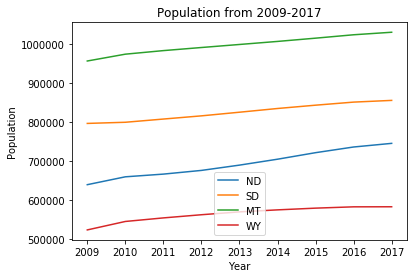

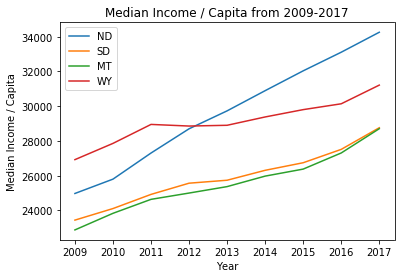

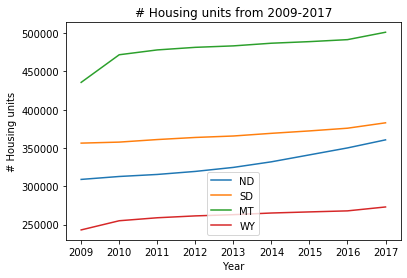

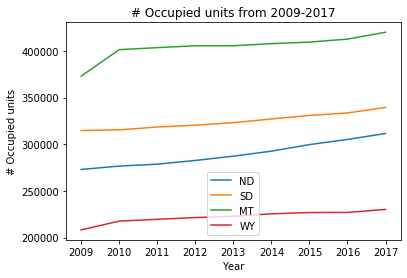

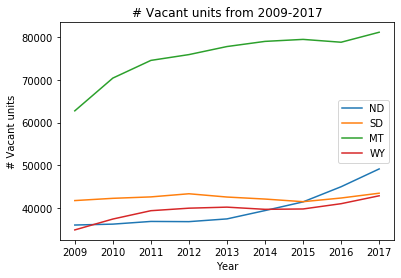

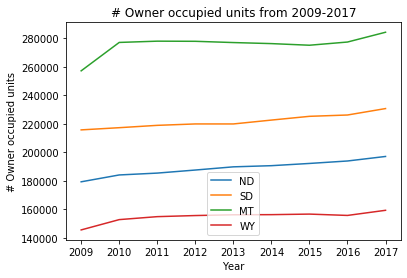

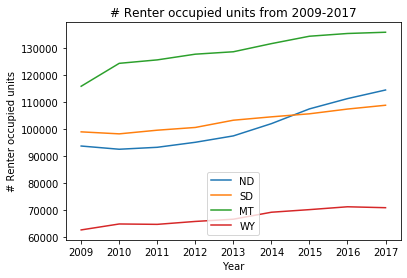

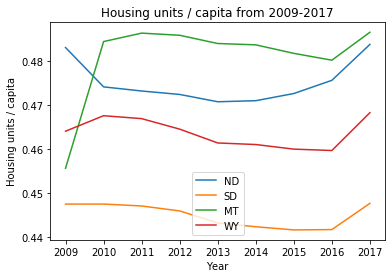

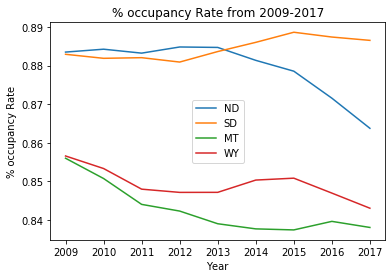

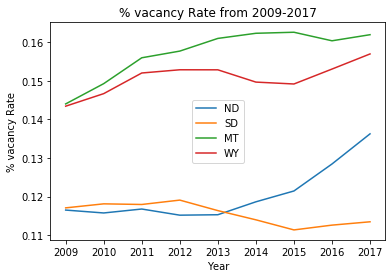

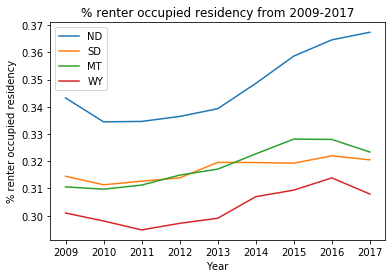

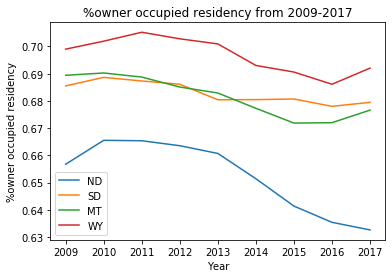

In [56]:
plotStateData(["ND", "SD", "MT", "WY"], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

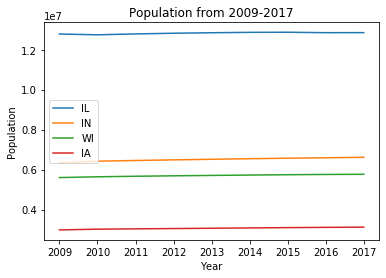

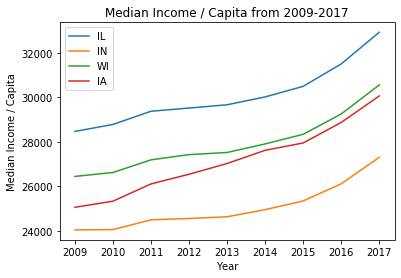

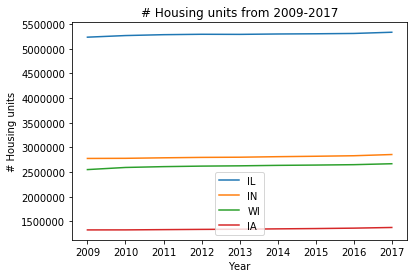

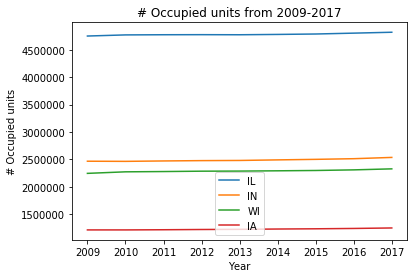

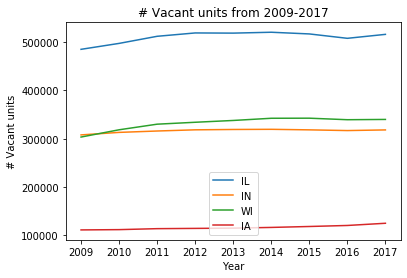

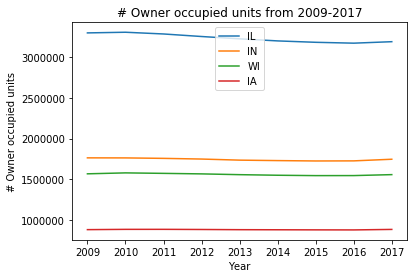

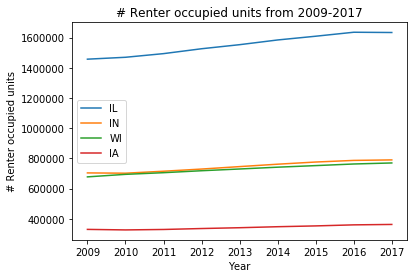

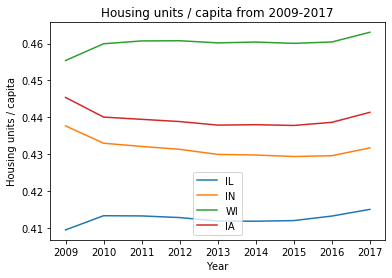

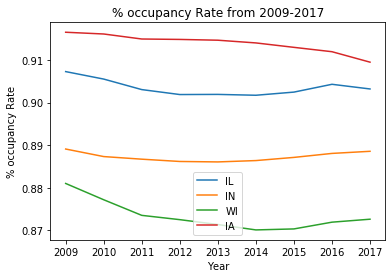

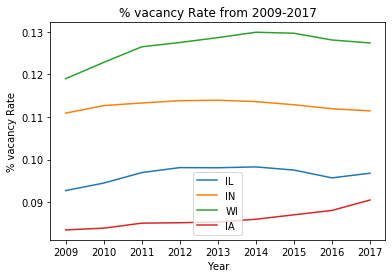

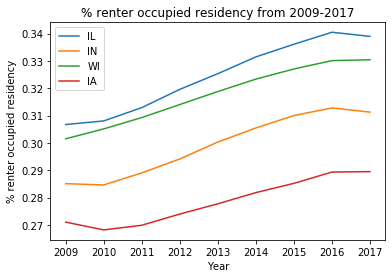

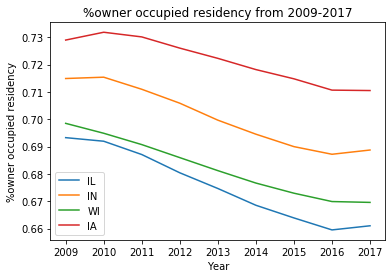

In [57]:
plotStateData(["IL", "IN", "WI", "IA"], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

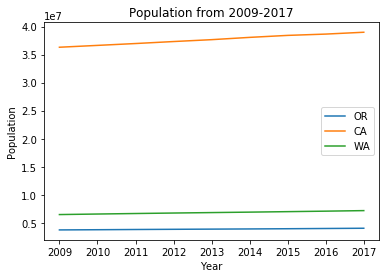

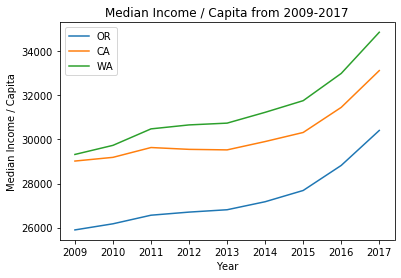

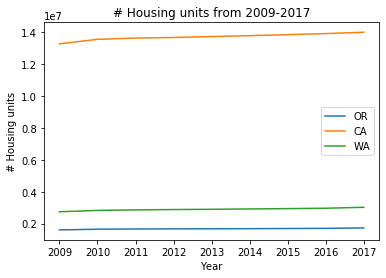

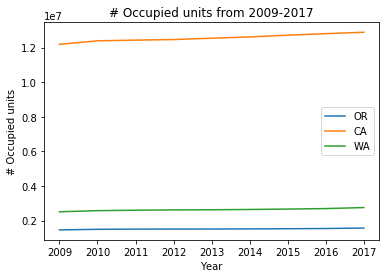

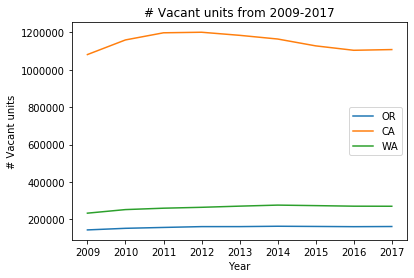

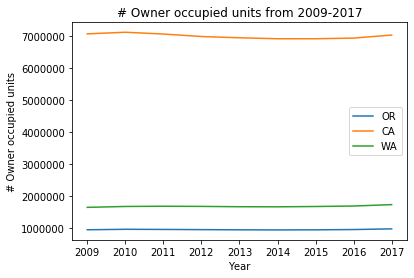

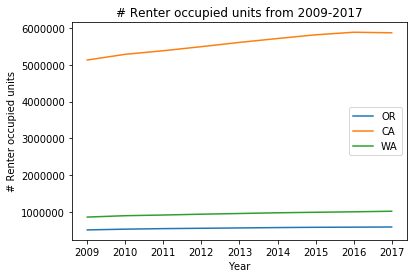

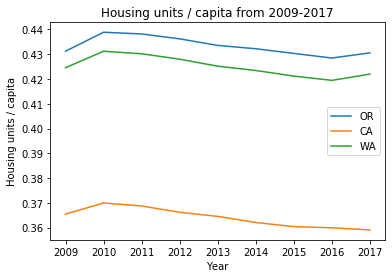

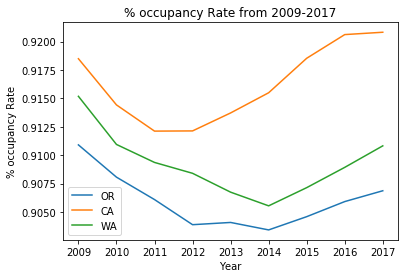

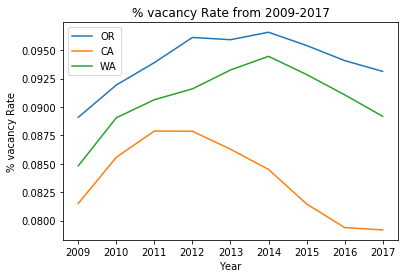

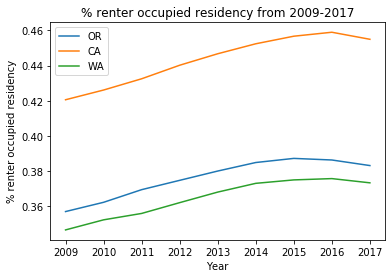

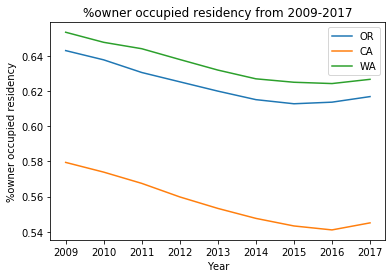

In [58]:
plotStateData(["OR", "CA", "WA"], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])